In [0]:
import torch
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt

In [0]:
n_pts = 100
centers = [[-0.5, 0.5], [0.5, -0.5]]
X, Y = datasets.make_blobs(n_samples = n_pts, random_state=123, centers=centers, cluster_std=0.5)
x_data = torch.tensor(X)
y_data = torch.tensor(Y.reshape(100, 1))

In [0]:
def scatter_plot():
  plt.scatter(X[Y==0, 0], X[Y==0, 1])
  plt.scatter(X[Y==1, 0], X[Y==1, 1])

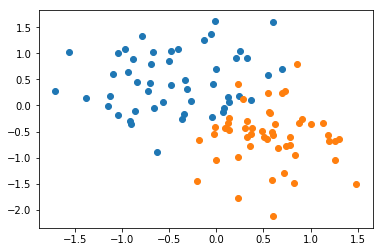

In [4]:
scatter_plot()

In [0]:
import torch.nn as nn

class Model(nn.Module):

  def __init__(self, input_size, output_size):
    super().__init__()
    self.linear = nn.Linear(input_size, output_size)

  def forward(self, X):
    pred = torch.sigmoid(self.linear(X))
    return pred

In [6]:
model = Model(2, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.2386, -0.6571]], requires_grad=True), Parameter containing:
tensor([-0.4958], requires_grad=True)]


In [0]:
w, b = model.parameters()
w1, w2 = w.view(2)
b1 = b[0]
def get_params():
  return (w1.item(), w2.item(), b1.item())

In [0]:
def plot_fit(title):
  plt.title = title
  w1, w2, b1 = get_params()
  x1 = np.array([-2.0, 2.0])
  # 0 = w1*x1 + w2*x2 + b
  x2 = (w1*x1 + b1)/-w2
  plt.plot(x1, x2, 'r')
  scatter_plot()

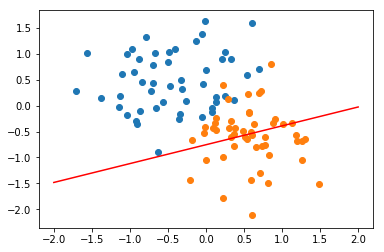

In [9]:
plot_fit('Untrained model')

In [0]:
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [13]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data.float())
  loss = criterion(y_pred, y_data.float())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

print(losses[:-10])

[0.3201431930065155, 0.3199942409992218, 0.31984537839889526, 0.3196968734264374, 0.3195485472679138, 0.31940072774887085, 0.31925293803215027, 0.31910550594329834, 0.3189583122730255, 0.3188113272190094, 0.31866466999053955, 0.31851837038993835, 0.3183721899986267, 0.31822624802589417, 0.31808072328567505, 0.31793534755706787, 0.3177902400493622, 0.31764543056488037, 0.31750091910362244, 0.31735655665397644, 0.31721246242523193, 0.3170686662197113, 0.3169250786304474, 0.31678175926208496, 0.3166387379169464, 0.31649598479270935, 0.3163534104824066, 0.31621116399765015, 0.31606900691986084, 0.31592732667922974, 0.3157857358455658, 0.31564438343048096, 0.3155033588409424, 0.3153626322746277, 0.3152220547199249, 0.3150818347930908, 0.3149416446685791, 0.314801961183548, 0.31466227769851685, 0.31452301144599915, 0.31438392400741577, 0.3142450451850891, 0.31410643458366394, 0.31396806240081787, 0.3138299882411957, 0.3136920630931854, 0.3135543763637543, 0.31341707706451416, 0.3132798373699

Text(0.5, 0, 'epochs')

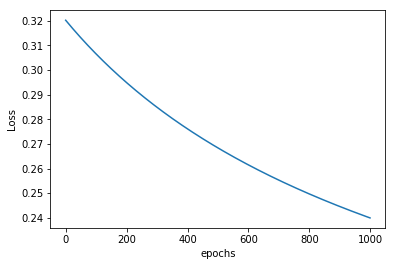

In [15]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epochs')

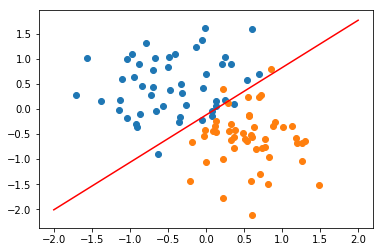

In [16]:
plot_fit("Trained Model")